## Objective

* Build a predictive model that answers what sorts of people were more likely to survive

## Imports

In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [110]:
traindf = pd.read_csv(r'D:\Projetos Python\Data-Projects\titanic_train.csv')
testdf = pd.read_csv(r'D:\Projetos Python\Data-Projects\titanic_test.csv')

## Train

In [111]:
traindf.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [112]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [113]:
for column in traindf.columns:

    emb = traindf[column].value_counts()
    display(emb)

#traindf.columns

PassengerId
1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: count, Length: 891, dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64

Sex
male      577
female    314
Name: count, dtype: int64

Age
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: count, Length: 88, dtype: int64

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

### Excluding columns useless for the model

In [114]:
traindf = traindf.drop(['PassengerId', 'Ticket', 'Fare', 'Cabin'],axis=1)

traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


### Null values filling 

In [115]:
traindf['Embarked'] = traindf['Embarked'].ffill()

traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Embarked  891 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 55.8+ KB


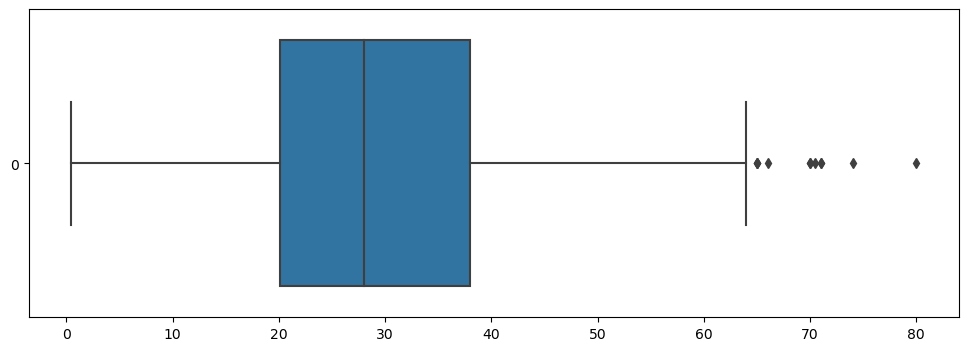

In [116]:
plt.figure(figsize=(12,4))

fig = sns.boxplot(traindf['Age'], orient='h')

<Axes: >

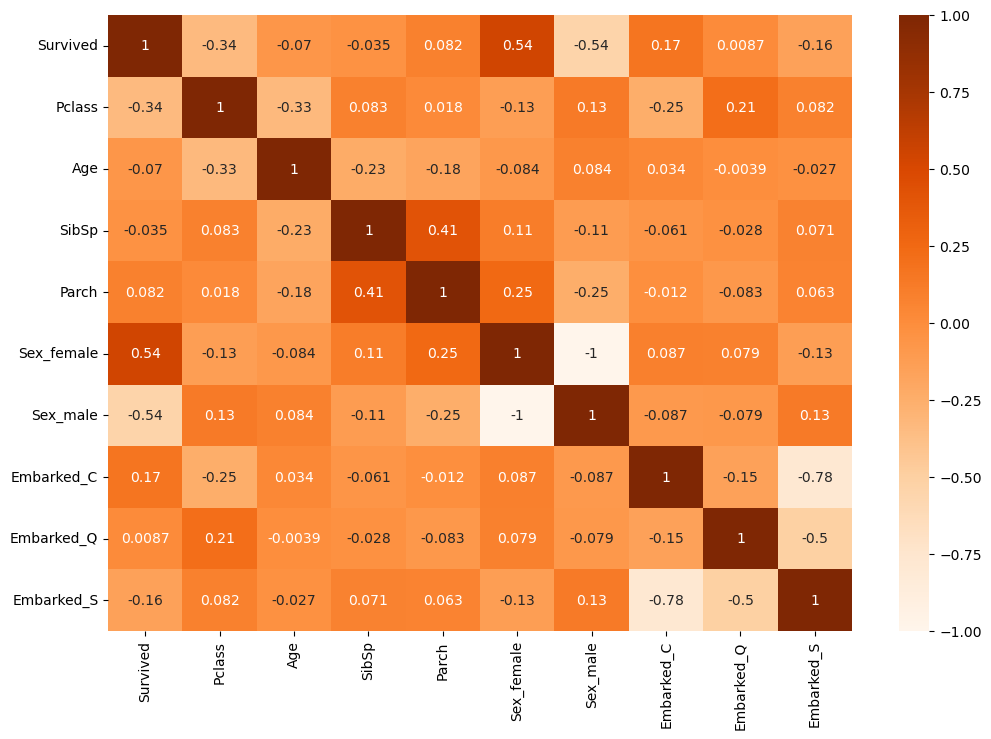

In [123]:
plt.figure(figsize=(12,8))
sns.heatmap(traindf_dummies.corr(numeric_only=True),annot=True, cmap = 'Oranges')

In [302]:
suv_df = pd.DataFrame(traindf[['Sex', 'Survived']].value_counts().groupby(['Survived','Sex']).sum()).reset_index()
print("--" * 15)
print(" " * 9, "Sex Counts")
print("--" * 15)
display(suv_df)

#for line in range(len(suv_df)):

suv_norm= pd.DataFrame(traindf[['Sex', 'Survived']].groupby('Sex', as_index=False).mean())
print("--" * 15)
print(" " * 7, "Survival Rate")
print("--" * 15)
display(suv_norm)
                      
# ax = sns.barplot(suv_df, x='Sex', y='count', hue='Survived')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1])

------------------------------
          Sex Counts
------------------------------


,Survived,Sex,count
0,0,female,81
1,0,male,468
2,1,female,233
3,1,male,109


------------------------------
        Survival Rate
------------------------------


,Sex,Survived
0,female,0.742038
1,male,0.188908


d:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


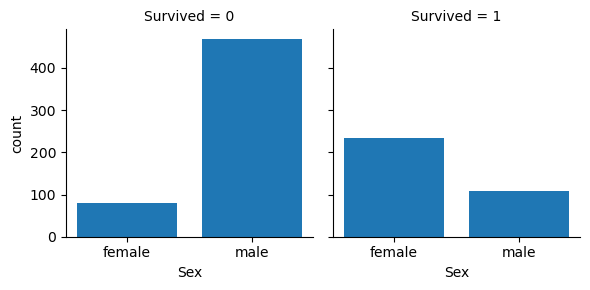

In [244]:
g = sns.FacetGrid(suv_df, col='Survived')
g.map(plt.bar,'Sex', 'count')


d:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


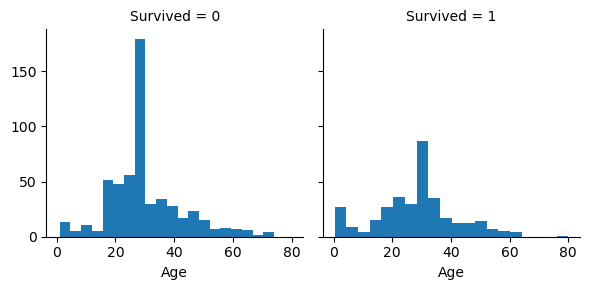

In [221]:
g = sns.FacetGrid(traindf, col='Survived')
g.map(plt.hist, 'Age', bins=20)

------------------------------
         Pclass Counts
------------------------------


,Survived,Pclass,Sex,count
0,0,1,female,3
1,0,1,male,77
2,0,2,female,6
3,0,2,male,91
4,0,3,female,72
5,0,3,male,300
6,1,1,female,91
7,1,1,male,45
8,1,2,female,70
9,1,2,male,17


------------------------------
     Pclass Survival Rate
------------------------------


,Pclass,Sex,Survived
0,1,female,0.968085
1,1,male,0.368852
2,2,female,0.921053
3,2,male,0.157407
4,3,female,0.500000
5,3,male,0.135447


d:\Anaconda\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


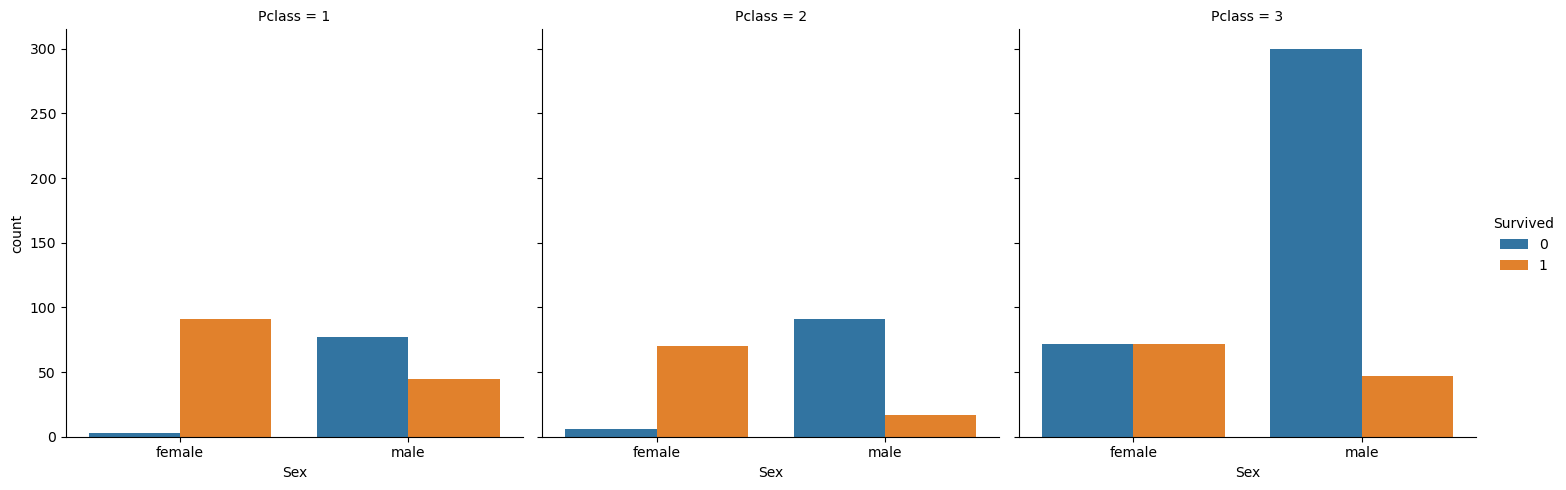

In [304]:
pclass_df = pd.DataFrame(traindf[['Pclass', 'Survived', 'Sex']].value_counts().groupby(['Survived','Pclass', 'Sex']).sum()).reset_index()
print("--" * 15)
print(" " * 8, "Pclass Counts")
print("--" * 15)
display(pclass_df)

pclass_norm= pd.DataFrame(traindf[['Sex', 'Survived', 'Pclass']].groupby(['Pclass', 'Sex'], as_index=False).mean())
print("--" * 15)
print(" " * 4, "Pclass Survival Rate")
print("--" * 15)
display(pclass_norm)

ax = sns.catplot(
    pclass_df, kind='bar',
    x='Sex', y='count', hue='Survived', col='Pclass', errorbar=None)